In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [3]:
data = pd.read_csv("./Train/Train.csv")
X_test = pd.read_csv("./Test/Test.csv")

In [4]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722
...,...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149,-80.110012
1596,-0.076099,0.255257,0.290054,1.796036,0.340350,118.315601
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520,-107.510508
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334,-47.341558


### Correlation matrix

In [6]:
data.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.017356,-0.007307,-0.051649,-0.004005,0.260274
feature_2,0.017356,1.000000,-0.053230,-0.000601,0.001096,0.855356
feature_3,-0.007307,-0.053230,1.000000,-0.004463,-0.066958,0.024866
feature_4,-0.051649,-0.000601,-0.004463,1.000000,-0.005602,0.396420
feature_5,-0.004005,0.001096,-0.066958,-0.005602,1.000000,0.014760
target,0.260274,0.855356,0.024866,0.396420,0.014760,1.000000


<AxesSubplot:>

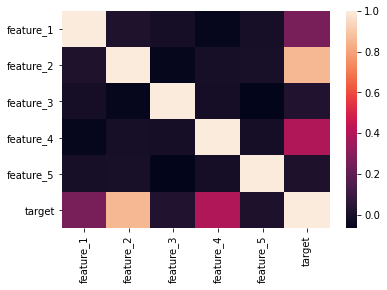

In [7]:
sns.heatmap(data.corr())

### Data Visualization

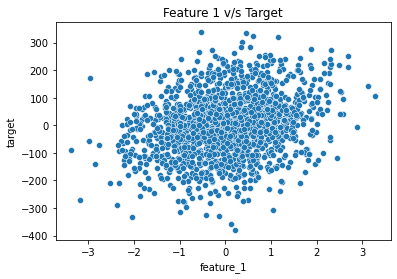

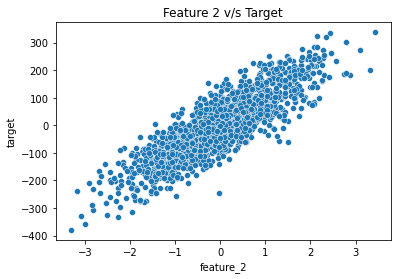

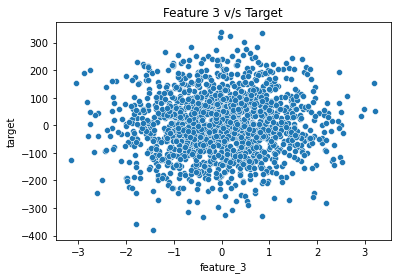

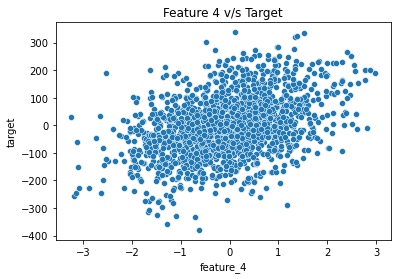

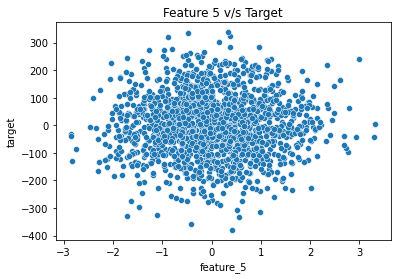

In [8]:
for i in range(5):
    plt.title(f"Feature {i+1} v/s Target")
    sns.scatterplot(x = f'feature_{i+1}', y = 'target', data = data, palette = 'inferno')
    plt.show()

### Training and Validation Split

In [9]:
features = data[ ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5']]
target = data['target']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.25, random_state = 33)

### Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Training Score", lr.score(X_train, y_train))

Training Score 0.9655254661616038


In [14]:
print("Validation Score", lr.score(X_val, y_val))

Validation Score 0.9675764947829993


### Training on Best Features

In [15]:
features = data[ ['feature_1', 'feature_2', 'feature_4']]
target = data['target']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.25, random_state = 33)

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Training Score", lr.score(X_train, y_train))

Training Score 0.9594050991069878


In [18]:
print("Validation Score", lr.score(X_val, y_val))

Validation Score 0.9619684980641108
